In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('data.csv')

x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
print(len(x))
index=np.arange(len(x))
np.random.shuffle(index)

501


3it [00:00, 136.73it/s]


train_loss: 3.7189448266053255
test_loss: 3.785058296411677


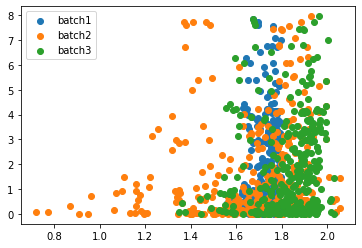

In [35]:
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
train_loss=[]
test_loss=[]
count=1
for train_index,test_index in tqdm(KFold(3).split(np.arange(len(x)))):
    x_train=x[index[train_index]]
    y_train=y[index[train_index]]
    x_test=x[index[test_index]]
    y_test=y[index[test_index]]
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(x_train, y_train)
    p1=clf.predict(x_train)
    p2=clf.predict(x_test)
    train_loss.append(mean_squared_error(p1,y_train))
    test_loss.append(mean_squared_error(p2,y_test))
    plt.scatter(p1,y_train,label='batch%d'%(count))
    
    count+=1
print('train_loss:',sum(train_loss)/3)
print('test_loss:',sum(test_loss)/3)
plt.title('Lasso')
plt.legend()

3it [00:00, 136.72it/s]


train_loss: 3.7217572814183106
test_loss: 3.7956079282951536


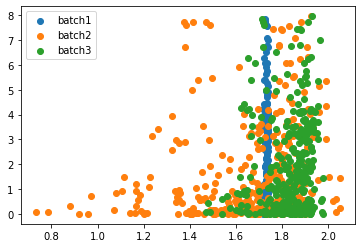

In [36]:
train_loss=[]
test_loss=[]
count=1
for train_index,test_index in tqdm(KFold(3).split(np.arange(len(x)))):
    x_train=x[index[train_index]]
    y_train=y[index[train_index]]
    x_test=x[index[test_index]]
    y_test=y[index[test_index]]
    clf = linear_model.BayesianRidge()
    clf.fit(x_train, y_train)
    p1=clf.predict(x_train)
    p2=clf.predict(x_test)
    train_loss.append(mean_squared_error(p1,y_train))
    test_loss.append(mean_squared_error(p2,y_test))
    plt.scatter(p1,y_train,label='batch%d'%(count))
    
    count+=1
print('train_loss:',sum(train_loss)/3)
print('test_loss:',sum(test_loss)/3)
plt.legend()
plt.title('BayesianRidge')



3it [00:02,  1.18it/s]


train_loss: 3.717096521926638
test_loss: 3.789308625022413


Text(0.5, 1.0, 'MLP')

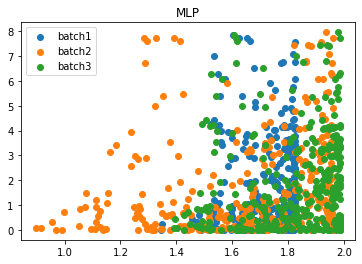

In [50]:
from sklearn.neural_network import MLPRegressor
train_loss=[]
test_loss=[]
count=1
for train_index,test_index in tqdm(KFold(3).split(np.arange(len(x)))):
    x_train=x[index[train_index]]
    y_train=y[index[train_index]]
    x_test=x[index[test_index]]
    y_test=y[index[test_index]]
    clf = MLPRegressor(hidden_layer_sizes=(20,40,20), activation='tanh',
                       solver='sgd', batch_size=167,
                       learning_rate='adaptive', max_iter=10000,
                      tol=1e-10)
    clf.fit(x_train, y_train)
    p1=clf.predict(x_train)
    p2=clf.predict(x_test)
    train_loss.append(mean_squared_error(p1,y_train))
    test_loss.append(mean_squared_error(p2,y_test))
    plt.scatter(p1,y_train,label='batch%d'%(count))
    
    count+=1
print('train_loss:',sum(train_loss)/3)
print('test_loss:',sum(test_loss)/3)
plt.legend()
plt.title('MLP')
